In [76]:
import wandb
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pdb

In [56]:
raga_labels = ['Bag', 'Bahar', 'Bilas', 'Jaun', 'Kedar', 'MM', 'Marwa', 'Nand', 'Shree']

In [2]:
video_table_name = 'snnithya/Gesture Analysis/Predictions:v22'
audio_table_name = 'snnithya/Gesture Analysis/Predictions:v26'

In [3]:
run = wandb.init('Gesture Analysis', name='Analyse Predictions Test')

wandb: Currently logged in as: snnithya (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.14 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


## Load audio and video data

In [26]:
video_table = run.use_artifact(video_table_name)
video_preds = video_table.get('val')

In [27]:
video_df = pd.DataFrame()
for col in video_preds.columns:
    video_df[col] = video_preds.get_column(col)

In [28]:
video_df = video_df.set_index('unique_id')

In [29]:
video_df

,true_label,predicted_class,prediction_probability_0,prediction_probability_1,prediction_probability_2,prediction_probability_3,prediction_probability_4,prediction_probability_5,prediction_probability_6,prediction_probability_7,prediction_probability_8
unique_id,,,,,,,,,,,
AG_6b_Bilas_41,2,2,0.000009,0.000005,9.968055e-01,4.576222e-06,0.000002,1.742773e-05,0.000775,0.001596,0.000785
AG_4b_Nand_95,7,2,0.000568,0.003236,9.708844e-01,7.614387e-04,0.004084,2.153202e-03,0.000788,0.016792,0.000733
AG_8_Kedar_62,4,6,0.039916,0.215727,2.244080e-01,5.688750e-03,0.013168,1.192403e-01,0.348208,0.023044,0.010601
AG_9b_Shree_66,8,5,0.000406,0.000034,3.376439e-04,1.190512e-03,0.000429,9.856935e-01,0.010531,0.000429,0.000949
AG_7b_Bahar_64,1,1,0.000100,0.996636,2.222286e-09,5.569218e-07,0.000009,3.571283e-08,0.003186,0.000053,0.000016
...,...,...,...,...,...,...,...,...,...,...,...
AG_3b_Bag_38,0,6,0.350109,0.015357,6.082068e-08,4.987170e-04,0.000056,9.549490e-05,0.404871,0.002372,0.226641
AG_8_Kedar_16,4,5,0.019651,0.041813,6.011195e-03,1.783390e-02,0.013966,8.830780e-01,0.014993,0.001505,0.001148
AG_3b_Bag_11,0,0,0.930803,0.000296,6.028062e-02,8.128643e-04,0.000254,7.732346e-04,0.000540,0.006075,0.000167


In [30]:
audio_table = run.use_artifact(audio_table_name)
audio_preds = audio_table.get('test_table')

In [31]:
audio_df = pd.DataFrame()
for col in audio_preds.columns:
    audio_df[col] = audio_preds.get_column(col)

In [32]:
audio_df = audio_df.set_index('unique_id')

In [33]:
audio_df

,predicted_class,prediction_probability_0,prediction_probability_1,prediction_probability_2,prediction_probability_3,prediction_probability_4,prediction_probability_5,prediction_probability_6,prediction_probability_7,prediction_probability_8
unique_id,,,,,,,,,,
AG_8_Kedar_0,4,0.002320,4.557771e-03,0.000172,0.023118,9.415980e-01,0.005596,3.372884e-03,1.676582e-02,0.002500
AG_8_Kedar_1,4,0.000276,2.796763e-04,0.000016,0.005771,9.873976e-01,0.001042,1.100297e-03,3.011710e-03,0.001106
AG_8_Kedar_2,4,0.000075,7.991036e-05,0.000008,0.004243,9.912434e-01,0.000502,6.212846e-04,1.896319e-03,0.001331
AG_8_Kedar_3,4,0.000477,7.175625e-04,0.000113,0.037627,9.489163e-01,0.003978,6.033580e-04,5.029523e-03,0.002539
AG_8_Kedar_4,4,0.003834,9.930537e-04,0.000070,0.008721,9.723110e-01,0.002299,7.837349e-03,3.188398e-03,0.000747
...,...,...,...,...,...,...,...,...,...,...
AG_6b_Bilas_100,2,0.000021,8.894418e-08,0.999395,0.000568,4.081994e-10,0.000008,3.060705e-07,3.278577e-08,0.000007
AG_6b_Bilas_101,2,0.000079,4.372463e-07,0.999315,0.000483,7.631981e-09,0.000035,1.161548e-05,4.005936e-07,0.000075
AG_6b_Bilas_102,2,0.000184,5.457008e-07,0.999528,0.000120,5.200091e-09,0.000086,3.077951e-05,3.400712e-07,0.000050


In [34]:
# add true label to audio df
audio_df = audio_df.join(video_df.loc[:, 'true_label'])

## Single model prediction evaluation

### Confusion matrix

Text(33.0, 0.5, 'True Class')

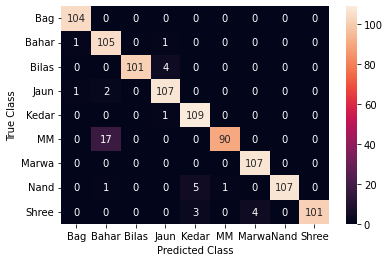

In [62]:
sns.heatmap(confusion_matrix(audio_df['true_label'], audio_df['predicted_class']), annot=True, 
            fmt='d', xticklabels=raga_labels, yticklabels=raga_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

Text(33.0, 0.5, 'True Class')

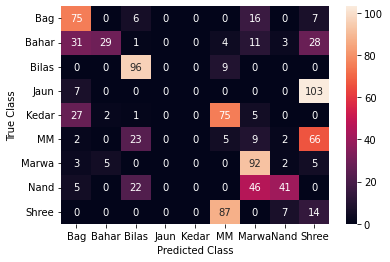

In [168]:
sns.heatmap(confusion_matrix(video_df['true_label'], video_df['predicted_class']), annot=True, 
            fmt='d', xticklabels=raga_labels, yticklabels=raga_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

### Confusion matrix with probabilities

In [119]:
def generate_conf_matrix_prob(df):
    conf_matrix = np.zeros((9, 9))
    for true_label, true_df in df.groupby('true_label'):
        true_sum = true_df.sum(axis=0)
        for pred_label in range(9):
            conf_matrix[true_label][pred_label] = (true_sum[f'prediction_probability_{pred_label}'])/true_df.shape[0]
    return conf_matrix

Text(105.0, 0.5, 'True Class')

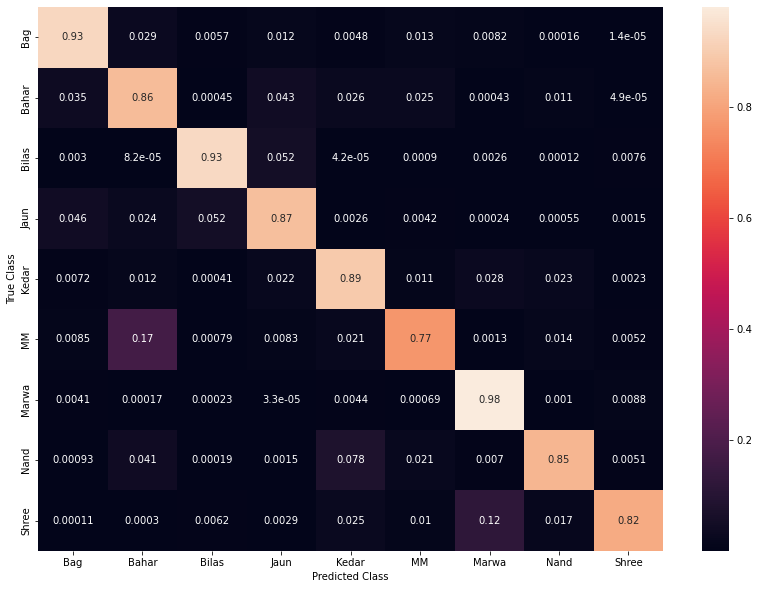

In [120]:
plt.figure(figsize=(14, 10))
sns.heatmap(generate_conf_matrix_prob(audio_df), annot=True, fmt='0.2g',
            xticklabels=raga_labels, yticklabels=raga_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

Text(105.0, 0.5, 'True Class')

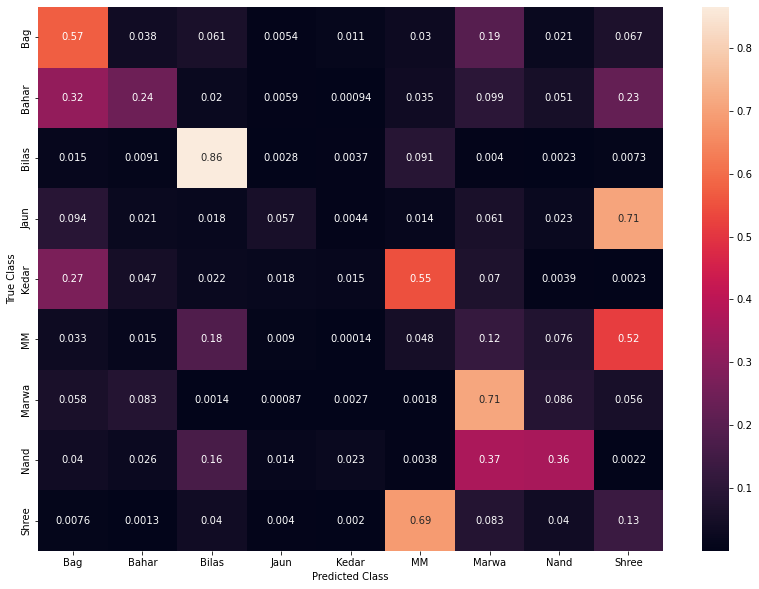

In [121]:
plt.figure(figsize=(14, 10))
sns.heatmap(generate_conf_matrix_prob(video_df), annot=True, fmt='0.2g',
            xticklabels=raga_labels, yticklabels=raga_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

## Comparing audio and video

#### True label confidence plot

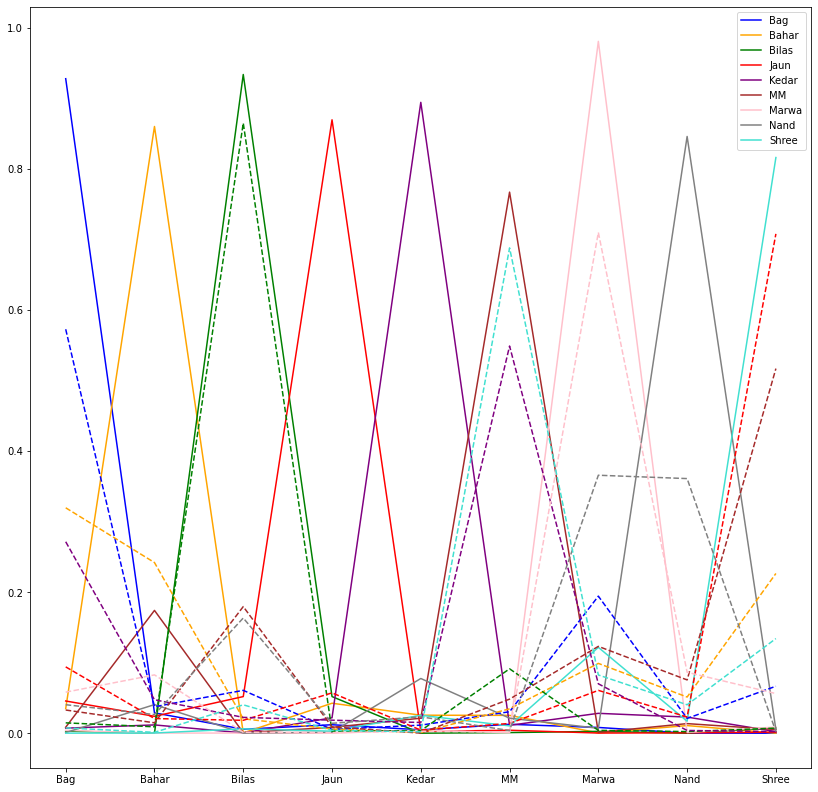

In [132]:
plt.figure(figsize=(14, 14))
c = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'turquoise']
for true_label, true_df in audio_df.groupby('true_label'):
    plt.plot(np.arange(9), true_df.sum(axis=0)[[f'prediction_probability_{i}' for i in range(9)]]/true_df.shape[0], label=raga_labels[true_label], c=c[true_label])
for true_label, true_df in video_df.groupby('true_label'):
    plt.plot(np.arange(9), true_df.sum(axis=0)[[f'prediction_probability_{i}' for i in range(9)]]/true_df.shape[0], linestyle='--', c=c[true_label])
plt.xticks(np.arange(9), raga_labels)
plt.legend()

#### Predicted label confidence plot

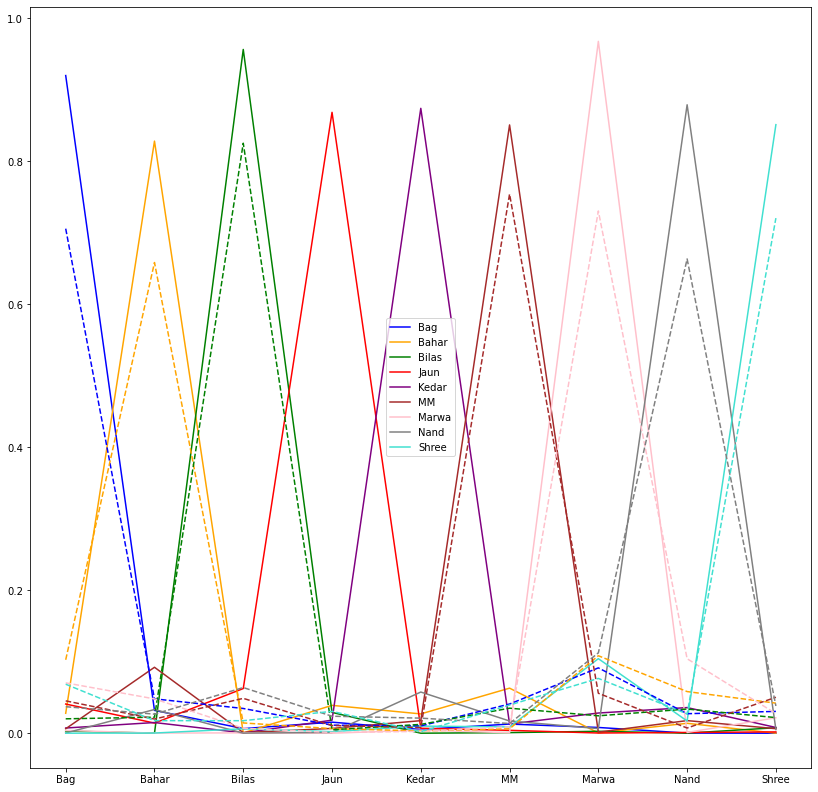

In [133]:
plt.figure(figsize=(14, 14))
c = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'turquoise']
for pred_label, pred_df in audio_df.groupby('predicted_class'):
    plt.plot(np.arange(9), pred_df.sum(axis=0)[[f'prediction_probability_{i}' for i in range(9)]]/pred_df.shape[0], label=raga_labels[pred_label], c=c[pred_label])
for pred_label, pred_df in video_df.groupby('predicted_class'):
    plt.plot(np.arange(9), pred_df.sum(axis=0)[[f'prediction_probability_{i}' for i in range(9)]]/pred_df.shape[0], linestyle='--', c=c[pred_label])
plt.xticks(np.arange(9), raga_labels)
plt.legend()

There were no Kedar or Jaunpuri predictions made by the video model

## Sample wise analysis

In [135]:
incorrect_audios = audio_df.loc[audio_df['true_label'] != audio_df['predicted_class']]
incorrect_videos = video_df.loc[video_df['true_label'] != video_df['predicted_class']]
correct_audios = audio_df.loc[audio_df['true_label'] == audio_df['predicted_class']]
correct_videos = video_df.loc[video_df['true_label'] == video_df['predicted_class']]

## Samples predicted correctly by video but incorrect by audio

In [144]:
i_audio_c_video = incorrect_audios.join(correct_videos, how='inner', lsuffix='_audio', rsuffix='_video')

In [146]:
i_audio_c_video

,predicted_class_audio,prediction_probability_0_audio,prediction_probability_1_audio,prediction_probability_2_audio,prediction_probability_3_audio,prediction_probability_4_audio,prediction_probability_5_audio,prediction_probability_6_audio,prediction_probability_7_audio,prediction_probability_8_audio,...,predicted_class_video,prediction_probability_0_video,prediction_probability_1_video,prediction_probability_2_video,prediction_probability_3_video,prediction_probability_4_video,prediction_probability_5_video,prediction_probability_6_video,prediction_probability_7_video,prediction_probability_8_video
unique_id,,,,,,,,,,,,,,,,,,,,,
AG_9b_Shree_18,6,0.000294,0.000038,0.011429,0.000140,1.051902e-03,0.001636,6.983978e-01,2.326219e-03,0.284686,...,8,8.392764e-03,1.544937e-03,3.854738e-02,5.225536e-03,4.416425e-03,3.129696e-01,0.164496,0.000544,4.638639e-01
AG_7b_Bahar_64,3,0.228445,0.248420,0.003196,0.390968,1.019586e-01,0.017682,1.551431e-03,7.654068e-03,0.000125,...,1,9.964184e-05,9.966362e-01,2.222286e-09,5.569218e-07,9.373432e-06,3.571283e-08,0.003186,0.000053,1.589531e-05
AG_7b_Bahar_65,0,0.429004,0.363957,0.001006,0.130415,5.546957e-02,0.015941,8.749602e-04,3.314746e-03,0.000018,...,1,1.697232e-03,9.806353e-01,1.353965e-07,8.225934e-05,1.360022e-04,2.030831e-06,0.014634,0.001973,8.400349e-04
AG_4b_Nand_111,4,0.001674,0.007176,0.000290,0.005154,5.208632e-01,0.005222,2.859703e-02,4.268045e-01,0.004219,...,7,1.632222e-03,1.926358e-04,7.136813e-08,3.240141e-05,4.929036e-06,1.409030e-07,0.000023,0.998105,9.424683e-06
AG_4b_Nand_112,4,0.000659,0.006310,0.000126,0.005040,6.096880e-01,0.003489,7.782222e-03,3.636413e-01,0.003265,...,7,1.631549e-03,4.355894e-04,3.325659e-08,3.575363e-05,6.170276e-06,1.227712e-07,0.000026,0.997855,9.991343e-06
AG_6b_Bilas_35,3,0.000777,0.000043,0.332533,0.665109,2.178655e-05,0.000578,1.982918e-05,2.649414e-05,0.000892,...,2,2.125124e-08,2.159403e-10,9.998116e-01,1.712196e-09,5.121140e-08,1.313798e-09,0.000071,0.000116,9.250121e-07
AG_6b_Bilas_36,3,0.005182,0.000721,0.464473,0.491067,1.404183e-03,0.009907,1.653870e-03,1.312715e-03,0.024278,...,2,6.584620e-08,1.337287e-09,9.996547e-01,8.765028e-09,2.378775e-07,5.513250e-09,0.000139,0.000204,2.061801e-06
AG_6b_Bilas_37,3,0.001118,0.000046,0.166275,0.830603,8.933486e-05,0.000498,6.849083e-05,5.811173e-05,0.001244,...,2,2.480956e-08,3.287490e-09,9.996669e-01,6.843046e-09,1.842420e-07,6.835141e-09,0.000145,0.000185,2.787245e-06
AG_6b_Bilas_50,3,0.000227,0.000009,0.476139,0.523590,7.083641e-08,0.000029,4.365370e-08,3.704547e-07,0.000005,...,2,1.144459e-02,1.554311e-01,7.568762e-01,2.056215e-03,9.456347e-03,1.605919e-03,0.029371,0.017413,1.634572e-02


AG_9b_Shree_18
AG_9b_Shree_18
AG_9b_Shree_18
AG_9b_Shree_18
AG_9b_Shree_18
AG_9b_Shree_18
AG_9b_Shree_18
AG_9b_Shree_18
AG_9b_Shree_18


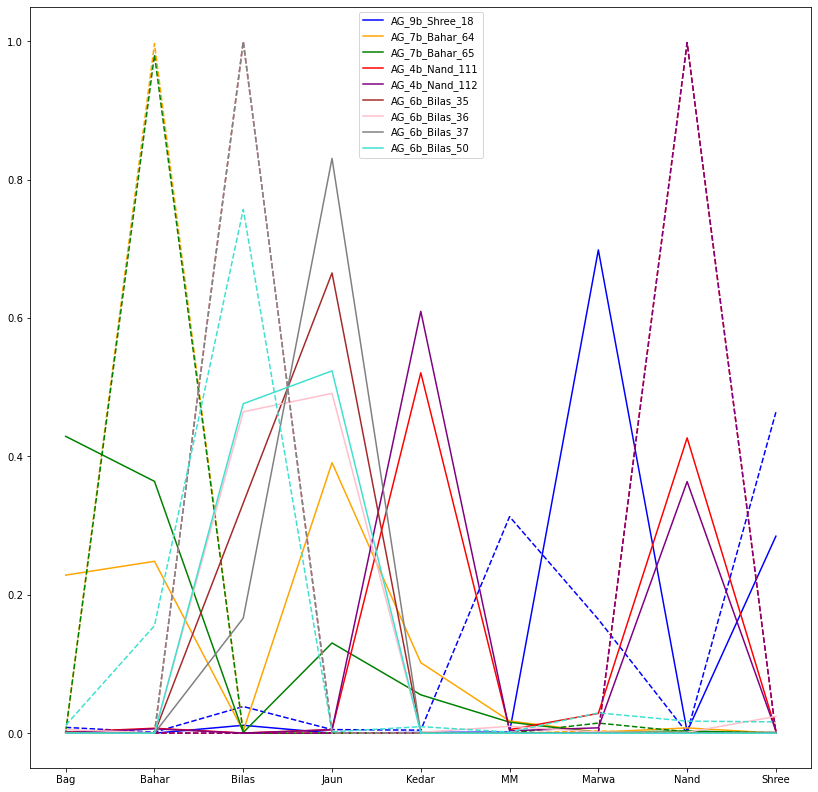

In [151]:
plt.figure(figsize=(14, 14))
c = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'turquoise']
for ind, (uniq_id, true_df) in enumerate(i_audio_c_video.iterrows()):
    plt.plot(np.arange(9), true_df[[f'prediction_probability_{i}_audio' for i in range(9)]], label=uniq_id, c=c[ind])
    plt.plot(np.arange(9), true_df[[f'prediction_probability_{i}_video' for i in range(9)]], linestyle='--', c=c[ind])
plt.xticks(np.arange(9), raga_labels)
plt.legend()

### Samples predicted incorrectly by video but correctly by audio

In [154]:
i_video_c_audio = correct_audios.join(incorrect_videos, how='inner', lsuffix='_audio', rsuffix='_video')

In [155]:
i_video_c_audio

,predicted_class_audio,prediction_probability_0_audio,prediction_probability_1_audio,prediction_probability_2_audio,prediction_probability_3_audio,prediction_probability_4_audio,prediction_probability_5_audio,prediction_probability_6_audio,prediction_probability_7_audio,prediction_probability_8_audio,...,predicted_class_video,prediction_probability_0_video,prediction_probability_1_video,prediction_probability_2_video,prediction_probability_3_video,prediction_probability_4_video,prediction_probability_5_video,prediction_probability_6_video,prediction_probability_7_video,prediction_probability_8_video
unique_id,,,,,,,,,,,,,,,,,,,,,
AG_8_Kedar_0,4,2.320271e-03,4.557771e-03,0.000172,0.023118,9.415980e-01,0.005596,0.003373,1.676582e-02,0.002500,...,5,0.104457,0.021205,0.012903,0.018042,0.006128,0.752341,0.046495,0.022807,0.015622
AG_8_Kedar_1,4,2.762946e-04,2.796763e-04,0.000016,0.005771,9.873976e-01,0.001042,0.001100,3.011710e-03,0.001106,...,5,0.073086,0.014590,0.011556,0.012858,0.005791,0.837145,0.026288,0.011976,0.006709
AG_8_Kedar_2,4,7.453787e-05,7.991036e-05,0.000008,0.004243,9.912434e-01,0.000502,0.000621,1.896319e-03,0.001331,...,5,0.040302,0.007364,0.009953,0.006218,0.004066,0.913362,0.012537,0.004125,0.002072
AG_8_Kedar_3,4,4.773014e-04,7.175625e-04,0.000113,0.037627,9.489163e-01,0.003978,0.000603,5.029523e-03,0.002539,...,5,0.017637,0.003672,0.007356,0.003628,0.002826,0.956530,0.006150,0.001419,0.000782
AG_8_Kedar_4,4,3.833576e-03,9.930537e-04,0.000070,0.008721,9.723110e-01,0.002299,0.007837,3.188398e-03,0.000747,...,5,0.011815,0.002353,0.005526,0.002432,0.002034,0.970108,0.004379,0.000869,0.000484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AG_6b_Bilas_69,2,6.985545e-03,3.185241e-04,0.865156,0.119151,7.958836e-05,0.001221,0.002266,3.236457e-04,0.004498,...,5,0.001188,0.008947,0.238850,0.000298,0.000158,0.742613,0.000664,0.000055,0.007226
AG_6b_Bilas_70,2,3.402995e-04,1.969285e-05,0.994737,0.000846,7.035985e-07,0.000743,0.000480,2.293956e-05,0.002810,...,5,0.001175,0.001746,0.028960,0.000178,0.000044,0.965986,0.000533,0.000015,0.001363
AG_6b_Bilas_71,2,3.945194e-04,4.544352e-06,0.997293,0.001921,9.962115e-08,0.000107,0.000059,3.033037e-06,0.000218,...,5,0.001494,0.003733,0.055284,0.000149,0.000050,0.937208,0.000383,0.000013,0.001685


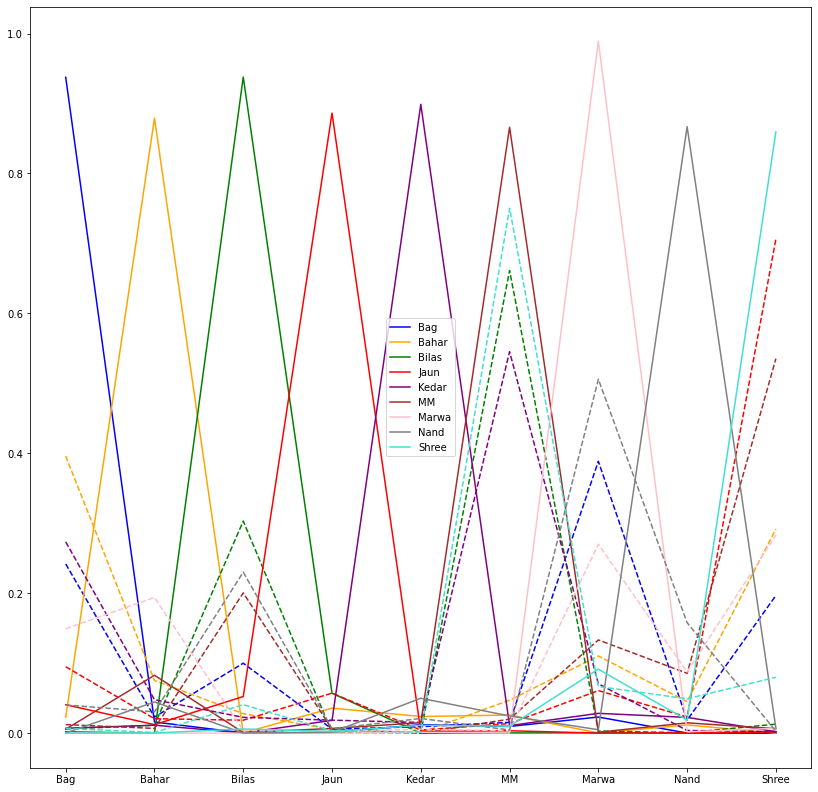

In [163]:
plt.figure(figsize=(14, 14))
c = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'turquoise']
for true_label, true_df in (i_video_c_audio.groupby('true_label_audio')):
    plt.plot(np.arange(9), true_df.sum(axis=0)[[f'prediction_probability_{i}_audio' for i in range(9)]]/true_df.shape[0], label=raga_labels[true_label], c=c[true_label])    
    plt.plot(np.arange(9), true_df.sum(axis=0)[[f'prediction_probability_{i}_video' for i in range(9)]]/true_df.shape[0], linestyle='--', c=c[true_label])
plt.xticks(np.arange(9), raga_labels)
plt.legend()

### Samples that are both incorrect

In [160]:
i_video_i_audio = incorrect_audios.join(incorrect_videos, how='inner', lsuffix='_audio', rsuffix='_video')

In [161]:
i_video_i_audio

,predicted_class_audio,prediction_probability_0_audio,prediction_probability_1_audio,prediction_probability_2_audio,prediction_probability_3_audio,prediction_probability_4_audio,prediction_probability_5_audio,prediction_probability_6_audio,prediction_probability_7_audio,prediction_probability_8_audio,...,predicted_class_video,prediction_probability_0_video,prediction_probability_1_video,prediction_probability_2_video,prediction_probability_3_video,prediction_probability_4_video,prediction_probability_5_video,prediction_probability_6_video,prediction_probability_7_video,prediction_probability_8_video
unique_id,,,,,,,,,,,,,,,,,,,,,
AG_8_Kedar_34,3,0.016998,0.043950,0.009056,0.409360,0.398440,0.051045,0.005319,0.051707,0.014127,...,5,0.046342,0.002754,3.739143e-03,2.133848e-03,1.725343e-03,9.368434e-01,0.004704,0.001201,0.000557
AG_9b_Shree_13,4,0.001372,0.001680,0.002818,0.027202,0.661727,0.066631,0.026351,0.025659,0.186561,...,5,0.016011,0.002041,2.215098e-02,1.132292e-02,9.822593e-03,5.712152e-01,0.276919,0.002394,0.088123
AG_9b_Shree_14,4,0.002902,0.002934,0.007366,0.030616,0.504185,0.087209,0.059213,0.043102,0.262474,...,5,0.018825,0.002119,2.155187e-02,1.082145e-02,1.109609e-02,5.722340e-01,0.275083,0.002145,0.086125
AG_9b_Shree_15,4,0.001644,0.002175,0.004340,0.033212,0.574646,0.075099,0.035230,0.030686,0.242968,...,5,0.019085,0.002425,2.894357e-02,8.990274e-03,1.130801e-02,5.209057e-01,0.303348,0.001538,0.103457
AG_9b_Shree_17,6,0.000135,0.000021,0.008889,0.000126,0.001134,0.002035,0.554116,0.002231,0.431312,...,5,0.012642,0.001886,5.027576e-02,6.097001e-03,8.485232e-03,4.114485e-01,0.238471,0.000622,0.270073
AG_9b_Shree_69,6,0.000030,0.000009,0.003699,0.000024,0.000606,0.000179,0.691603,0.002589,0.301261,...,5,0.000277,0.000020,2.042669e-04,5.121198e-04,4.498738e-04,9.921502e-01,0.005701,0.000290,0.000395
AG_9b_Shree_70,6,0.000087,0.000024,0.008291,0.000122,0.001353,0.000541,0.545089,0.002666,0.441827,...,5,0.000464,0.000018,1.517984e-04,5.610025e-04,5.047675e-04,9.914077e-01,0.005913,0.000390,0.000590
AG_4b_Nand_36,5,0.001430,0.094063,0.001476,0.008388,0.068759,0.488508,0.014529,0.299168,0.023681,...,6,0.000047,0.000202,1.195929e-10,2.335218e-10,1.940047e-08,3.772325e-09,0.941508,0.058239,0.000003
AG_4b_Nand_56,4,0.007420,0.126328,0.000327,0.008810,0.491333,0.025188,0.008695,0.330158,0.001742,...,6,0.001167,0.005631,9.317410e-06,4.770846e-06,3.895673e-05,3.400411e-05,0.694805,0.298186,0.000124


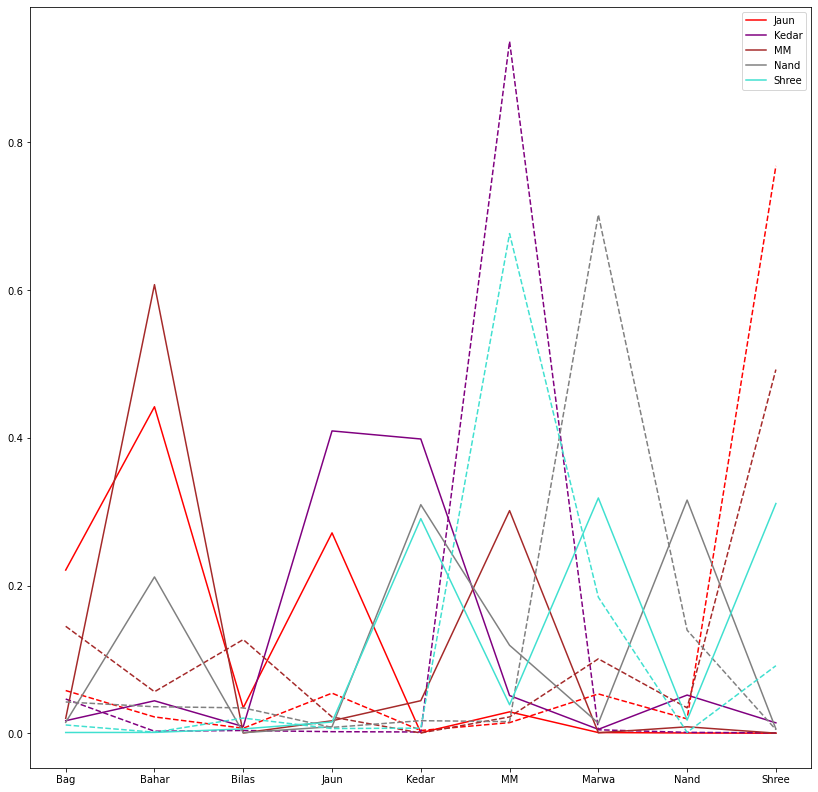

In [164]:
plt.figure(figsize=(14, 14))
c = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'turquoise']
for true_label, true_df in (i_video_i_audio.groupby('true_label_audio')):
    plt.plot(np.arange(9), true_df.sum(axis=0)[[f'prediction_probability_{i}_audio' for i in range(9)]]/true_df.shape[0], label=raga_labels[true_label], c=c[true_label])    
    plt.plot(np.arange(9), true_df.sum(axis=0)[[f'prediction_probability_{i}_video' for i in range(9)]]/true_df.shape[0], linestyle='--', c=c[true_label])
plt.xticks(np.arange(9), raga_labels)
plt.legend()

In [165]:
c_video_c_audio = correct_audios.join(correct_videos, how='inner', lsuffix='_audio', rsuffix='_video')

In [166]:
c_video_c_audio

,predicted_class_audio,prediction_probability_0_audio,prediction_probability_1_audio,prediction_probability_2_audio,prediction_probability_3_audio,prediction_probability_4_audio,prediction_probability_5_audio,prediction_probability_6_audio,prediction_probability_7_audio,prediction_probability_8_audio,...,predicted_class_video,prediction_probability_0_video,prediction_probability_1_video,prediction_probability_2_video,prediction_probability_3_video,prediction_probability_4_video,prediction_probability_5_video,prediction_probability_6_video,prediction_probability_7_video,prediction_probability_8_video
unique_id,,,,,,,,,,,,,,,,,,,,,
AG_3b_Bag_4,0,0.987130,2.616527e-03,0.000024,0.000323,1.965869e-03,0.000280,7.645674e-03,1.517495e-05,8.536676e-08,...,0,0.789130,0.030194,0.005511,0.014169,0.005979,0.030815,0.115999,0.001021,0.007182
AG_3b_Bag_5,0,0.992354,2.423878e-03,0.000032,0.000357,6.169094e-04,0.000314,3.895702e-03,6.702442e-06,5.342098e-08,...,0,0.870555,0.022055,0.013615,0.017326,0.005566,0.021007,0.043459,0.001657,0.004760
AG_3b_Bag_6,0,0.992143,6.334843e-04,0.000005,0.000060,4.582282e-04,0.000084,6.614954e-03,1.466363e-06,8.327187e-09,...,0,0.894443,0.015135,0.041620,0.017010,0.003575,0.008309,0.012898,0.003927,0.003082
AG_3b_Bag_7,0,0.989180,9.412153e-04,0.000032,0.000320,7.042153e-04,0.000152,8.665988e-03,4.510727e-06,5.672284e-08,...,0,0.934588,0.006193,0.033432,0.007734,0.001450,0.002715,0.007547,0.004602,0.001739
AG_3b_Bag_8,0,0.977840,6.372185e-03,0.000437,0.006501,1.678626e-03,0.000980,6.149292e-03,4.203963e-05,9.334143e-07,...,0,0.950015,0.001803,0.032917,0.004233,0.000596,0.001693,0.001726,0.006274,0.000743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AG_6b_Bilas_100,2,0.000021,8.894418e-08,0.999395,0.000568,4.081994e-10,0.000008,3.060705e-07,3.278577e-08,6.768956e-06,...,2,0.000389,0.000021,0.997204,0.000019,0.000019,0.000607,0.000069,0.000554,0.001120
AG_6b_Bilas_101,2,0.000079,4.372463e-07,0.999315,0.000483,7.631981e-09,0.000035,1.161548e-05,4.005936e-07,7.515121e-05,...,2,0.000238,0.000016,0.997197,0.000006,0.000007,0.000230,0.000039,0.000659,0.001608
AG_6b_Bilas_102,2,0.000184,5.457008e-07,0.999528,0.000120,5.200091e-09,0.000086,3.077951e-05,3.400712e-07,5.032436e-05,...,2,0.000315,0.000040,0.996456,0.000005,0.000006,0.000150,0.000113,0.000680,0.002235


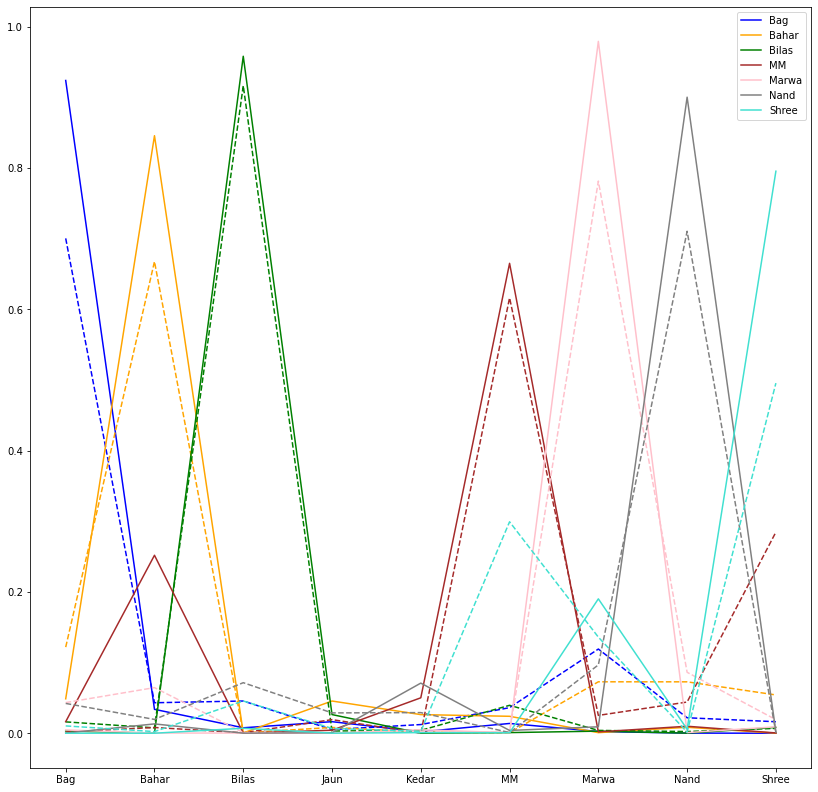

In [167]:
plt.figure(figsize=(14, 14))
c = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'turquoise']
for true_label, true_df in (c_video_c_audio.groupby('true_label_audio')):
    plt.plot(np.arange(9), true_df.sum(axis=0)[[f'prediction_probability_{i}_audio' for i in range(9)]]/true_df.shape[0], label=raga_labels[true_label], c=c[true_label])    
    plt.plot(np.arange(9), true_df.sum(axis=0)[[f'prediction_probability_{i}_video' for i in range(9)]]/true_df.shape[0], linestyle='--', c=c[true_label])
plt.xticks(np.arange(9), raga_labels)
plt.legend()

### Confidence Histograms

#### Correct Predictions

In [186]:
correct_audio_vals = []
for i, row in correct_audios.iterrows():
    correct_audio_vals.append(row[f'prediction_probability_{int(row["true_label"])}'])

[0.72080582 0.95416659 0.99686915]


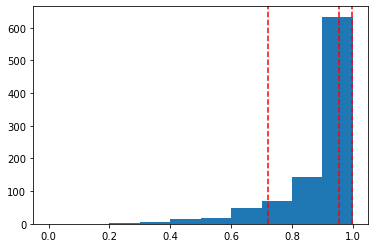

In [187]:
plt.hist(correct_audio_vals, bins=np.arange(0, 1.1, 0.1))
quantile_vals = np.quantile(correct_audio_vals, [0.1, 0.5, 0.9])
for q in quantile_vals:
    plt.axvline(q, linestyle='--', c='red')
print(quantile_vals)

In [188]:
correct_video_vals = []
for i, row in correct_videos.iterrows():
    correct_video_vals.append(row[f'prediction_probability_{int(row["true_label"])}'])

[0.43249944 0.83726364 0.99856155]


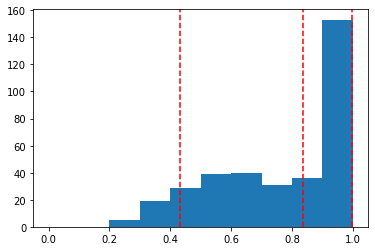

In [189]:
plt.hist(correct_video_vals, bins=np.arange(0, 1.1, 0.1))
quantile_vals = np.quantile(correct_video_vals, [0.1, 0.5, 0.9])
for q in quantile_vals:
    plt.axvline(q, linestyle='--', c='red')
print(quantile_vals)

#### Incorrect predictions

In [195]:
incorrect_audio_vals = []
incorrect_audio_pred_conf = []
for i, row in incorrect_audios.iterrows():
    incorrect_audio_vals.append(row[f'prediction_probability_{int(row["true_label"])}'])
    incorrect_audio_pred_conf.append(row[f'prediction_probability_{int(row["predicted_class"])}'])

##### True label prediction confidence - audio

[0.16393794 0.30701208 0.44986412]


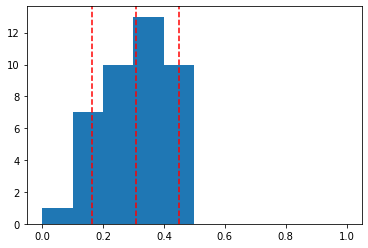

In [196]:
plt.hist(incorrect_audio_vals, bins=np.arange(0, 1.1, 0.1))
quantile_vals = np.quantile(incorrect_audio_vals, [0.1, 0.5, 0.9])
for q in quantile_vals:
    plt.axvline(q, linestyle='--', c='red')
print(quantile_vals)

##### Predicted label prediction confidence - audio

[0.42900375 0.55286419 0.70318425]


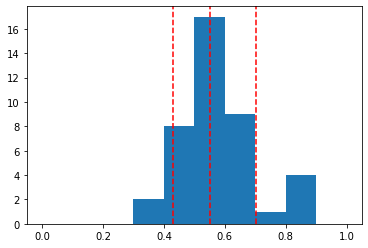

In [197]:
plt.hist(incorrect_audio_pred_conf, bins=np.arange(0, 1.1, 0.1))
quantile_vals = np.quantile(incorrect_audio_pred_conf, [0.1, 0.5, 0.9])
for q in quantile_vals:
    plt.axvline(q, linestyle='--', c='red')
print(quantile_vals)

In [199]:
incorrect_video_vals = []
incorrect_video_pred_conf = []
for i, row in incorrect_videos.iterrows():
    incorrect_video_vals.append(row[f'prediction_probability_{int(row["true_label"])}'])
    incorrect_video_pred_conf.append(row[f'prediction_probability_{int(row["predicted_class"])}'])

##### True label prediction confidence - video

[0.00145395 0.03412266 0.25200284]


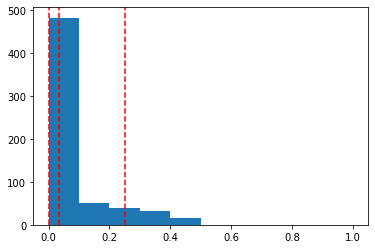

In [193]:
plt.hist(incorrect_video_vals, bins=np.arange(0, 1.1, 0.1))
quantile_vals = np.quantile(incorrect_video_vals, [0.1, 0.5, 0.9])
for q in quantile_vals:
    plt.axvline(q, linestyle='--', c='red')
print(quantile_vals)

##### Predicted label prediction confidence - video

[0.42811652 0.74233371 0.96145906]


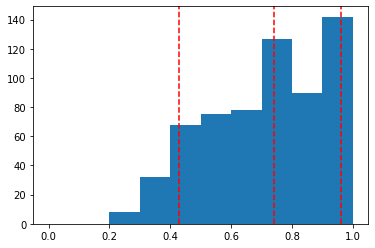

In [203]:
plt.hist(incorrect_video_pred_conf, bins=np.arange(0, 1.1, 0.1))
quantile_vals = np.quantile(incorrect_video_pred_conf, [0.1, 0.5, 0.9])
for q in quantile_vals:
    plt.axvline(q, linestyle='--', c='red')
print(quantile_vals)

In [204]:
incorrect_videos.to_csv('incorrect_vid_preds.csv')